# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


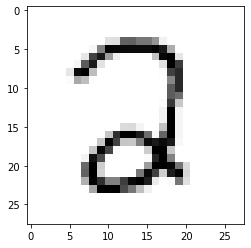

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2269264452492351
train accuracy is: 0.7773326656651645, test accuracy is 0.7837701612903226


Epoch 10 Loss 0.07063532295042196
train accuracy is: 0.9311467200801202, test accuracy is 0.9410282258064516


Epoch 20 Loss 0.04750801388720807
train accuracy is: 0.9492572191620764, test accuracy is 0.9551411290322581


Epoch 30 Loss 0.038799203334765095
train accuracy is: 0.956851944583542, test accuracy is 0.9632056451612904


Epoch 40 Loss 0.03416858040346077
train accuracy is: 0.9617759973293273, test accuracy is 0.9642137096774194


Epoch 50 Loss 0.031198690055252946
train accuracy is: 0.9645301285261225, test accuracy is 0.9657258064516129


Epoch 60 Loss 0.02906137776008412
train accuracy is: 0.9659489233850777, test accuracy is 0.9682459677419355


Epoch 70 Loss 0.02739431175545017
train accuracy is: 0.9680353864129527, test accuracy is 0.96875


Epoch 80 Loss 0.026026291799436604
train accuracy is: 0.9696210983141379, test accuracy is 0.9692540322580645


Epoch 90 Loss 0.024859584792057975
train accuracy is: 0.970872976130863, test accuracy is 0.9702620967741935


Epoch 100 Loss 0.023836395230924196
train accuracy is: 0.9722083124687031, test accuracy is 0.9717741935483871


Epoch 110 Loss 0.022919868536848027
train accuracy is: 0.9739609414121182, test accuracy is 0.9722782258064516


Epoch 120 Loss 0.022095091166852578
train accuracy is: 0.9748789851443832, test accuracy is 0.9727822580645161


Epoch 130 Loss 0.02133472166373647
train accuracy is: 0.9758804873977633, test accuracy is 0.9732862903225806


Epoch 140 Loss 0.020651402021980014
train accuracy is: 0.9771323652144884, test accuracy is 0.9742943548387096


Epoch 150 Loss 0.020003913919554892
train accuracy is: 0.9781338674678685, test accuracy is 0.9747983870967742


Epoch 160 Loss 0.019398659614017884
train accuracy is: 0.9788849941579035, test accuracy is 0.9753024193548387


Epoch 170 Loss 0.018834940513584014
train accuracy is: 0.9792188282423635, test accuracy is 0.9753024193548387


Epoch 180 Loss 0.018288234515042946
train accuracy is: 0.9804707060590886, test accuracy is 0.9758064516129032


Epoch 190 Loss 0.017774346372744956
train accuracy is: 0.9810549157068936, test accuracy is 0.9768145161290323


Epoch 200 Loss 0.01728211112400969
train accuracy is: 0.9819729594391587, test accuracy is 0.9773185483870968


Epoch 210 Loss 0.0168136084332331
train accuracy is: 0.9826406276080788, test accuracy is 0.9778225806451613


Epoch 220 Loss 0.016374421790206203
train accuracy is: 0.9832248372558838, test accuracy is 0.9778225806451613


Epoch 230 Loss 0.015961707954573294
train accuracy is: 0.9838090469036889, test accuracy is 0.9778225806451613


Epoch 240 Loss 0.01556502732424906
train accuracy is: 0.9841428809881488, test accuracy is 0.9783266129032258


0.0006232568364495368

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2391534054620842
train accuracy is: 0.7184944082790853, test accuracy is 0.7409274193548387


Epoch 10 Loss 0.10178584471946708
train accuracy is: 0.9112835920547487, test accuracy is 0.9238911290322581


Epoch 20 Loss 0.07867202465278396
train accuracy is: 0.9288098814889, test accuracy is 0.9380040322580645


Epoch 30 Loss 0.06800171490447061
train accuracy is: 0.9375730262059756, test accuracy is 0.9450604838709677


Epoch 40 Loss 0.06155794227076981
train accuracy is: 0.9420797863461859, test accuracy is 0.9485887096774194


Epoch 50 Loss 0.05714868051060704
train accuracy is: 0.9448339175429812, test accuracy is 0.9506048387096774


Epoch 60 Loss 0.05389793670924524
train accuracy is: 0.9465030879652813, test accuracy is 0.952116935483871


Epoch 70 Loss 0.05137899980143265
train accuracy is: 0.9485895509931564, test accuracy is 0.9546370967741935


Epoch 80 Loss 0.04935493495548457
train accuracy is: 0.9500918043732265, test accuracy is 0.9556451612903226


Epoch 90 Loss 0.04768406601617035
train accuracy is: 0.9520113503588716, test accuracy is 0.9571572580645161


Epoch 100 Loss 0.04627291008626323
train accuracy is: 0.9524286429644466, test accuracy is 0.9576612903225806


Epoch 110 Loss 0.0450615519055123
train accuracy is: 0.9535970622600568, test accuracy is 0.9591733870967742


Epoch 120 Loss 0.04400562469078334
train accuracy is: 0.9545985645134368, test accuracy is 0.9601814516129032


Epoch 130 Loss 0.043075194829484846
train accuracy is: 0.9555166082457018, test accuracy is 0.9616935483870968


Epoch 140 Loss 0.04224651005261071
train accuracy is: 0.9562677349357369, test accuracy is 0.9642137096774194


Epoch 150 Loss 0.04150262784204929
train accuracy is: 0.956685027541312, test accuracy is 0.9647177419354839


Epoch 160 Loss 0.04082875068812656
train accuracy is: 0.957185778668002, test accuracy is 0.9647177419354839


Epoch 170 Loss 0.04021527228574257
train accuracy is: 0.9578534468369221, test accuracy is 0.9647177419354839


Epoch 180 Loss 0.039652436517481175
train accuracy is: 0.9585211150058421, test accuracy is 0.9652217741935484


Epoch 190 Loss 0.039135464327161446
train accuracy is: 0.9588549490903021, test accuracy is 0.9657258064516129


Epoch 200 Loss 0.0386565413340886
train accuracy is: 0.9595226172592222, test accuracy is 0.9662298387096774


Epoch 210 Loss 0.038212030873978425
train accuracy is: 0.9599399098647972, test accuracy is 0.9667338709677419


Epoch 220 Loss 0.03779790504064589
train accuracy is: 0.9600233683859122, test accuracy is 0.9667338709677419


Epoch 230 Loss 0.037410847730777116
train accuracy is: 0.9604406609914873, test accuracy is 0.9662298387096774


Epoch 240 Loss 0.037047202157412584
train accuracy is: 0.9606910365548322, test accuracy is 0.9662298387096774


0.030962255551162166

### Comparing results of NN and LR

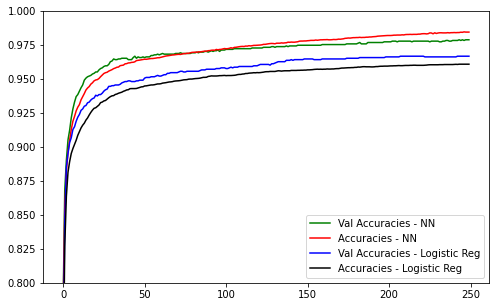

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

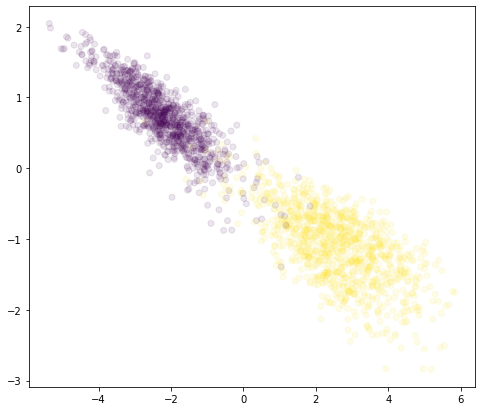

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

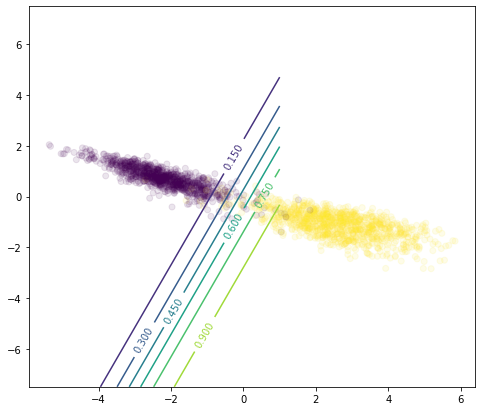

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );